In [1]:
# !uv pip install pandas numpy scanpy anndata matplotlib scikit-misc

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt

In [3]:
# Load in the data
adata=sc.read('./sc_RNAseq_adata_downsampled_to5percent.h5ad')

In [4]:
# To check if everything is there, I moved and downsampled this object from a much larger one with more detailed anaylsis, so we for now we do not need to worry about most things in here
adata

AnnData object with n_obs × n_vars = 7876 × 27361
    obs: 'condition', 'replicate', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels_score', 'Order', 'Lane', 'Index', 'cancer', 'reference', 'flowcell', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'htapp', 'sequenced', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_metastasis', 'ER_primary', 'ER_biopsy', 'PR_primary', 'PR_biopsy', 'HER2_primary', 'HER2_biopsy', 'receptors_primary', 'receptors_biopsy', 'site_biopsy', 'histology_breast', 'histology_biopsy', 'sampleid', 'cnv_cors', 'cnv_cors_max', 'cnv_score', 'cnv_ref_score', 'cnv_score_norm', 'cnv_score_norm_norm', 'cnv_condition', 'cnv_score_norm_norm2', 'pam50_Basal_single', 'pam50_Her2_single', 'pam50_LumA_single', 'pam50_LumB_single', 'pam50_Normal_single', 'pam50_mo

In [5]:
# The matrix is stored in a sparse format to condense size as i
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 16088879 stored elements and shape (7876, 27361)>

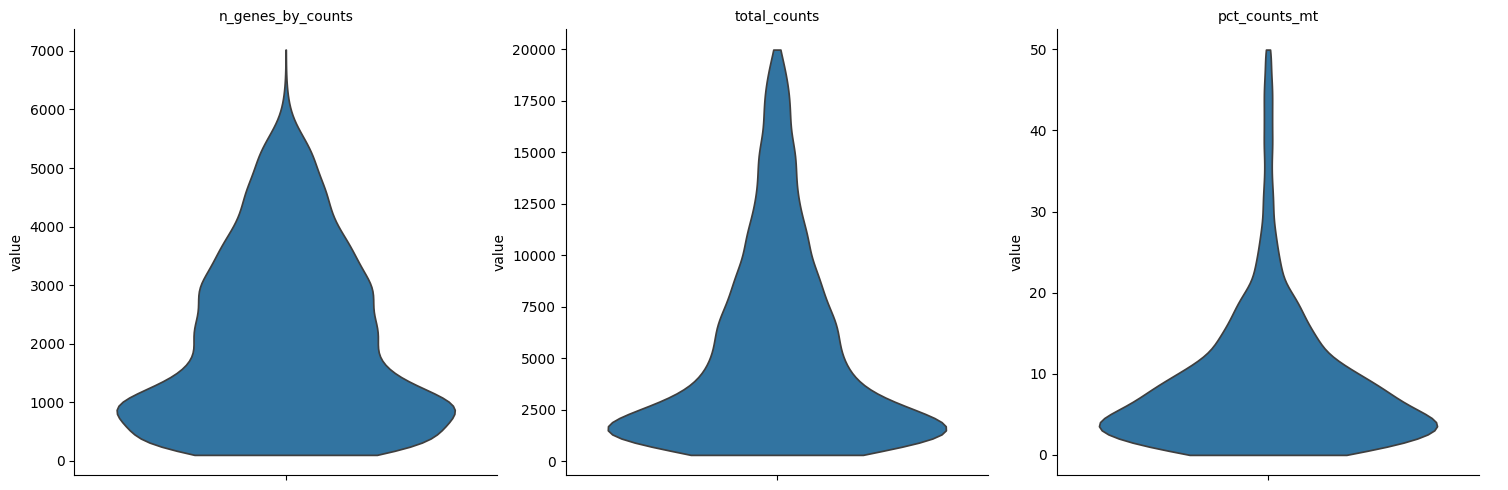

In [6]:
# A way to visualise quality metrics of the matrices
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], size=0, multi_panel=True)

[<Axes: title={'center': 'pct_counts_mt'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <Axes: title={'center': 'cell_type'}, xlabel='X_umap1', ylabel='X_umap2'>]

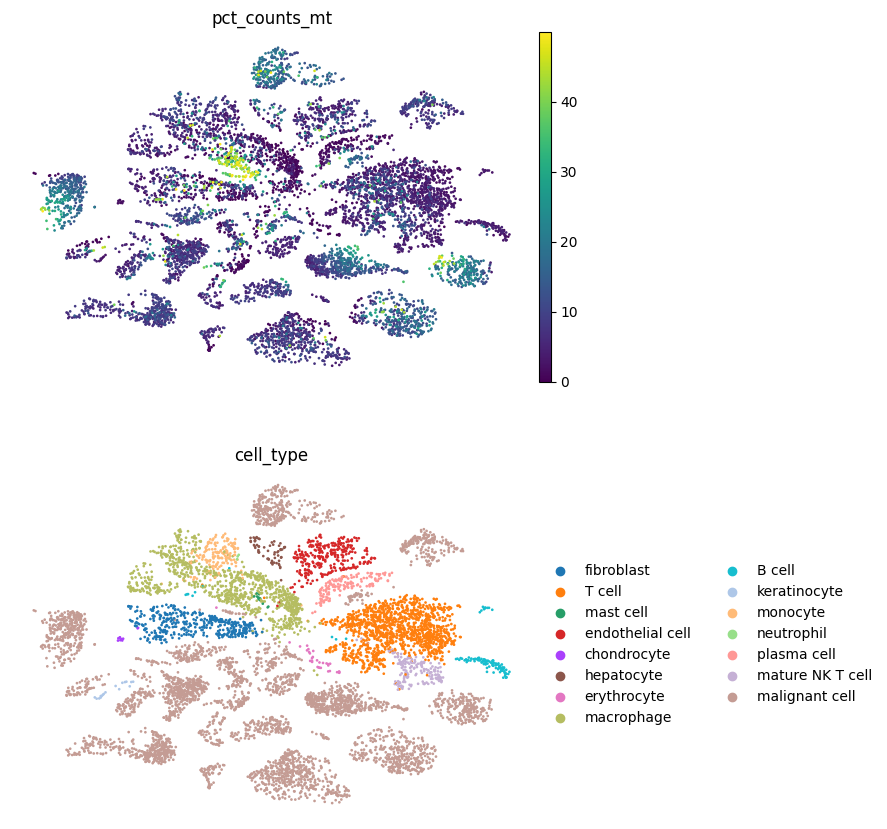

In [7]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=['pct_counts_mt','cell_type'],
#    legend_loc='on data',
    ncols=1,size=15,
    frameon=False, 
    show=False
)

In [8]:
adata.layers['raw_counts'] = adata.X.copy()

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [10]:
sc.pp.log1p(adata)

In [11]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', layer='raw_counts', n_top_genes=5000)

In [12]:
sc.pp.pca(adata, use_highly_variable=True)

/Users/madhavajay/dev/single-cell/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(


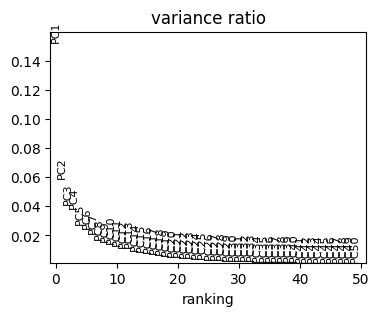

In [13]:
with plt.rc_context({'figure.figsize':(4,3)}):
    sc.pl.pca_variance_ratio(adata, n_pcs=50)

In [14]:
sc.pp.neighbors(adata, n_pcs=50)

In [15]:
sc.tl.umap(adata)

<Axes: title={'center': 'cell_type'}, xlabel='X_umap1', ylabel='X_umap2'>

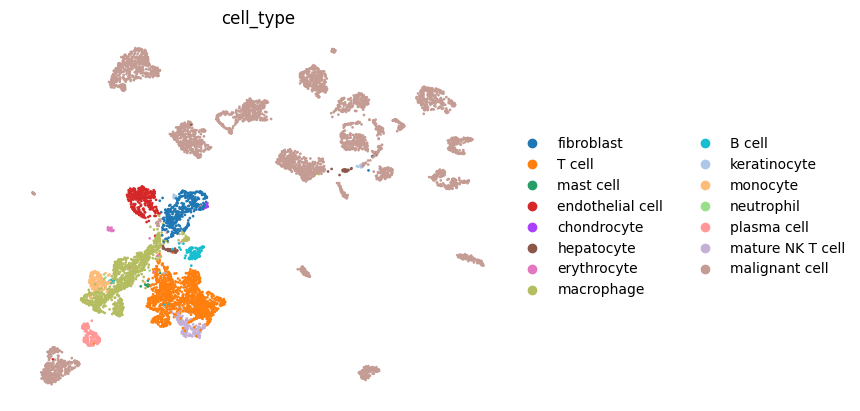

In [16]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=['cell_type'],
#    legend_loc='on data',
    ncols=1,size=15,
    frameon=False, 
    show=False
)